# Yelp Data Challenge - Clustering and PCA

### Flora Li

## Goal
***1. Cluster the review text data for all the restaurants: ***
<br>
(1) Define variables: feature variables - text, target variable - stars ( less than 5-stars imperfect,  equals 5-stars perfect)
<br>
(2) Split into train and test dataset
<br>
(3) Get NLP representation of the documents: quantify data in text documents (TF-IDF)
<br>
(4) Cluster text reviews with KMeans

***2. Cluster all the reviews of the most reviewed restaurant***
<br>
most_reviewed_restaurant = df['business_id'].value_counts().index[0]

***3. Use PCA to reduce dimensionality***
<br>
(1) Use PCA to transform data: reduce to 50 dimension
<br>
(2) Measure variance explained by each principal componet
<br>
(3) Classifying positive/negative review (5 stars/ less than 5 stars) with PCA preprocessing: logistic regression, random forest


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [77]:
df = pd.read_csv('last_2_years_restaurant_reviews1.csv')

In [168]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,favorable
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w,True
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw,True
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg,True
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw,False
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw,True


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338573 entries, 0 to 338572
Data columns (total 12 columns):
business_id    338573 non-null object
name           338573 non-null object
categories     338573 non-null object
avg_stars      338573 non-null float64
cool           338573 non-null int64
date           338573 non-null object
funny          338573 non-null int64
review_id      338573 non-null object
stars          338573 non-null int64
text           338573 non-null object
useful         338573 non-null int64
user_id        338573 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 31.0+ MB


## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [80]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values
# use .values to convert documents be numpy array.

In [81]:
type(documents)

numpy.ndarray

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [82]:
# Make a column and take the values, save to a variable named "target"
imperfect = df['stars'] < 5
perfect = df['stars'] == 5
target = perfect.values

In [83]:
type(perfect), type(target)

(pandas.core.series.Series, numpy.ndarray)

In [84]:
target[:5]

array([ True,  True,  True, False,  True], dtype=bool)

#### You may want to look at the statistic of the target variable

In [85]:
target.mean(), target.std()

(0.46748264037593074, 0.49894150090274003)

In [86]:
# dimensions of target and feature variables
target.shape, documents.shape

((338573L,), (338573L,))

### Create training dataset and test dataset

In [87]:
from sklearn.cross_validation import train_test_split

In [88]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train, documents_test, target_train, target_test= train_test_split(
    documents, 
    target, 
    test_size = 0.3, 
    random_state=12)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 1000)

In [91]:
# Train the model with your training data - documents_train
vectors_train = vectorizer.fit_transform(documents_train).toarray()

In [92]:
vectors_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.50100549],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [93]:
# Get the vocab of your tfidf
features = vectorizer.get_feature_names()

In [94]:
# Use the trained model to transform all the reviews - documents
vectors_documents = vectorizer.transform(documents).toarray()

In [95]:
type(vectors_documents)

numpy.ndarray

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [96]:
# Fit Kmeans clustering with the training vectors
from time import time
t0=time()

from sklearn.cluster import KMeans

kmeans = KMeans()

kmeans.fit(vectors_train)

t1=time()

print "Fit KMeans model cost {0:4f}%s".format(t1-t0)

Fit KMeans model cost 948.498000%s


#### Make predictions on all your data

In [97]:
# assign cluster labels to all reviews
assigned_cluster = kmeans.predict(vectors_documents)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered, we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [98]:
# cluster centers shape
print "clusterd centeres:"
print kmeans.cluster_centers_.shape
type(kmeans.cluster_centers_)
# means 8 clusters, and 1000 features (a word is a feature) in each cluster
# note: numpy matrices are 2-dimentional, while numpy arrays can be N-dimentional. Matrix objects are a subclass of ndarray.

clusterd centeres:
(8L, 1000L)


numpy.ndarray

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [99]:
# sort top 10 features for i centroid
n_feature = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feature-1:-1] #sort from big to small (desc)
# argsort returns index
top_centroids

array([[148, 336, 326, 720, 364, 598, 640, 371, 477, 747],
       [326, 597, 889, 449, 775, 540, 123, 477, 230, 365],
       [640, 326,  77, 934, 222,  26, 502, 775, 477, 889],
       [638, 202, 364, 640, 371, 796, 143,  77, 597, 449],
       [364, 326, 693, 640, 775, 669, 566, 477, 371, 449],
       [109, 340, 110, 364, 143, 779, 640, 326, 371, 598],
       [859, 729, 728, 640,  53, 371, 364, 334, 320, 775],
       [371, 326, 775, 640,  26, 338,  51, 825, 221,  41]], dtype=int64)

In [100]:
top_centroids[0]

array([148, 336, 326, 720, 364, 598, 640, 371, 477, 747], dtype=int64)

In [101]:
print "top 10 features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(features[i] for i in centroid)) 
# num is used to count the number of centroids, and one row in top_centroids is a centroid

top 10 features for each cluster:
0: chicken, fried, food, rice, good, ordered, place, great, like, sauce
1: food, order, time, just, service, minutes, came, like, didn, got
2: place, food, best, vegas, delicious, amazing, love, service, like, time
3: pizza, crust, good, place, great, slice, cheese, best, order, just
4: good, food, really, place, service, pretty, nice, like, great, just
5: burger, fries, burgers, good, cheese, shake, place, food, great, ordered
6: sushi, rolls, roll, place, ayce, great, good, fresh, fish, service
7: great, food, service, place, amazing, friendly, awesome, staff, definitely, atmosphere


#### Try different k
If you set k == to a different number, how does the top features change?

In [102]:
# kmeans with 6 clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [103]:
# randomly select two reviews in each cluster from the whole data
for i in range(kmeans.n_clusters):                                       
    cluster = np.arange(0, vectors_documents.shape[0])[assigned_cluster==i]  #index of cluster
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print "cluster %d:" % i
    for review in sample_reviews:
        print "    %d\n%%s" % df.loc[review]['stars'] % df.loc[review]['text'] 

cluster 0:
    5
I was recommended here from a friend and this is the best place to go to! All healthy choices and extremely delicious! I had a chicken Caesar wrap and my brothers got another wrap and a pepperoni pizza bread. The line was long but it went by so fast. Cashiers were very friendly and nice and are fast. We didn't wait long for our order. Definitely recommend if you want something healthy, filling, and all for a good price!
    4
Hubby had the steak sandwich. He loved it. I had the chicken fingers on frys. 
We had vouchers for lunch. And chose not to upgrade the the grill experience. But we watched lots of people who were. And  I will be back to give that a try. YUM.
cluster 1:
    4
Food was great. Parking sucked. My living room might be bigger than the dining room, the biggest table only had 4 seats. Went there (Dean Martin Dr. location) with some friends from San Diego. Our party was three adults and two children. They have a kids menu, but the very small venue isn't ve

Because randomly selected, sometimes stars in each cluster are similar, but sometimes not.

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [104]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant

# df['business_id'].value_counts(): counting appearance of each business_id
most_reviewed_restaurant = df['business_id'].value_counts().index[0]
# Here, business_id is the index.

# select rows of most reviewed restaurant
df_top_restaurant = df[df['business_id']== most_reviewed_restaurant].copy().reset_index()

# display head
df_top_restaurant.head()

,index,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,250334,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Restaurants, Barbeque, Asian Fusion, Japanese...",4.5,0,2016-03-26,0,kd4UZwpH86KUxGr4pwafHQ,5,The food was soooo good. Defintiely worth the ...,0,mW_hZQb_ZHiV-EhuXn9NkQ
1,250335,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Restaurants, Barbeque, Asian Fusion, Japanese...",4.5,0,2015-12-25,0,hb-vHJj08C9PcPk5GhvmLA,5,"The BBQ is yummy, and the soup is delicious. B...",0,DEmhjzcwgAfVI6Z23qxlIQ
2,250336,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Restaurants, Barbeque, Asian Fusion, Japanese...",4.5,1,2016-01-14,0,k4QFvv-0Es9n7864hEfaZw,5,I ate here for the first time with my Dad. Our...,1,9imSnJsjKTSTMlyMZ3EYYg
3,250337,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Restaurants, Barbeque, Asian Fusion, Japanese...",4.5,1,2016-07-12,1,MSO2c0jJxffesZ5nyhChiA,5,Arguably the best Korean BBQ I've ever eaten!!...,1,GtikpvzhSeE4OszoFO1-3A
4,250338,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"[Restaurants, Barbeque, Asian Fusion, Japanese...",4.5,0,2017-01-19,0,d97BSImX_nu-oQh-IL7H4Q,5,Amazing food and great service! Enjoyed Kore...,0,-jEryluA1cM-rkkT6bwr9w


In [105]:
df_top_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 13 columns):
index          2771 non-null int64
business_id    2771 non-null object
name           2771 non-null object
categories     2771 non-null object
avg_stars      2771 non-null float64
cool           2771 non-null int64
date           2771 non-null object
funny          2771 non-null int64
review_id      2771 non-null object
stars          2771 non-null int64
text           2771 non-null object
useful         2771 non-null int64
user_id        2771 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 281.5+ KB


We can see there are 2771 observations about the most reviewed restaurant.

We can also load restaurant profile information from the business dataset (optional)

In [106]:
# Load business dataset (optional)
import json
import pandas as pd

file_business = 'business.json'
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)
    
# Take a look at the most reviewed restaurant's profile (optional)
df_business[df_business['business_id']==most_reviewed_restaurant]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
1477,4480 Paradise Rd,"{u'GoodForMeal': {u'dessert': True, u'latenigh...",hihud--QRriCYZw1zZvW4g,"[Restaurants, Barbeque, Asian Fusion, Japanese...",Las Vegas,"{u'Monday': u'11:30-1:00', u'Tuesday': u'11:30...",1,36.108898,-115.151261,Gangnam Asian BBQ Dining,Eastside,89169,3180,4.5,NV


In [107]:
df_business[df_business['business_id'] == most_reviewed_restaurant]['categories'].values

array([ [u'Restaurants', u'Barbeque', u'Asian Fusion', u'Japanese', u'Tapas/Small Plates', u'Korean']], dtype=object)

In [108]:
df_business[df_business['business_id'] == most_reviewed_restaurant]['attributes'].values

array([ {u'GoodForMeal': {u'dessert': True, u'latenight': True, u'lunch': True, u'dinner': True, u'brunch': False, u'breakfast': False}, u'DogsAllowed': False, u'Alcohol': u'beer_and_wine', u'Caters': True, u'HasTV': True, u'GoodForKids': True, u'NoiseLevel': u'average', u'WiFi': u'free', u'RestaurantsAttire': u'casual', u'RestaurantsReservations': True, u'OutdoorSeating': False, u'BusinessAcceptsCreditCards': True, u'RestaurantsPriceRange2': 2, u'BikeParking': True, u'RestaurantsTableService': True, u'RestaurantsDelivery': False, u'Ambience': {u'romantic': False, u'intimate': False, u'classy': False, u'hipster': False, u'divey': False, u'touristy': False, u'trendy': True, u'upscale': False, u'casual': True}, u'RestaurantsTakeOut': True, u'RestaurantsGoodForGroups': True, u'WheelchairAccessible': True, u'BusinessParking': {u'garage': False, u'street': False, u'validated': False, u'lot': True, u'valet': False}}], dtype=object)

### Vectorize the text feature

In [109]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values

documents_top_restaurant[:3]

array([ 'The food was soooo good. Defintiely worth the stop. Happy hour prices are unbeatable. Overall, great experience.',
       "The BBQ is yummy, and the soup is delicious. BTW the waiter and waitress are friendly. I'll definitely come again.",
       'I ate here for the first time with my Dad. Our waiter explained everything and we ordered several random dishes to cook ourselves.\r\nFriendly service, great food and a truly unique dining experience!'], dtype=object)

### Define your target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [110]:
df_top_restaurant['favorable'] = (df_top_restaurant['stars'] > 4)
df_top_restaurant['favorable'][:5]

0    True
1    True
2    True
3    True
4    True
Name: favorable, dtype: bool

In [111]:
target_top_restaurant = df_top_restaurant['favorable'].values.astype(int)
target_top_restaurant

array([1, 1, 1, ..., 1, 0, 1])

#### Check the statistic of the target variable

In [112]:
target_top_restaurant.mean(), target_top_restaurant.std()

(0.73439191627571276, 0.4416564610470442)

In [113]:
documents_top_restaurant.shape, target_top_restaurant.shape

((2771L,), (2771L,))

### Create training dataset and test dataset

In [114]:
from sklearn.cross_validation import train_test_split

In [115]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7

X_train, X_test, y_train, y_test= train_test_split(
    documents_top_restaurant, 
    target_top_restaurant, 
    test_size = 0.3, 
    random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1939L,), (832L,), (1939L,), (832L,))

### Get NLP representation of the documents

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer= TfidfVectorizer(stop_words='english',
                          max_features = 1000)

In [118]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(X_train).toarray()

In [119]:
# Get the vocab of your tfidf
words = vectorizer.get_feature_names()

In [120]:
# Use the trained model to transform the test data
vectors_train.shape

(1939L, 1000L)

In [121]:
# Use the trained model to transform all the data
vectors_test = vectorizer.transform(X_test).toarray()
vectors_documents_top_restaurant = vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [122]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
kmeans.fit(vectors_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [123]:
assigned_cluster = kmeans.predict(vectors_documents_top_restaurant)

#### Inspect the centroids

In [124]:
print "cluster centers:"
print kmeans.cluster_centers_.shape

cluster centers:
(5L, 1000L)


#### Find the top 10 features for each cluster.

In [125]:
n_feat = 10
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-n_feat-1:-1]

print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(words[i] for i in centroid))

top features for each cluster:
0: food, meat, time, delicious, place, ordered, service, came, got, definitely
1: good, really, food, meat, service, place, nice, quality, come, recommend
2: great, food, service, place, amazing, recommend, definitely, atmosphere, come, delicious
3: happy, hour, great, food, good, place, definitely, service, awesome, pork
4: korean, bbq, best, vegas, place, las, food, ve, great, good


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [126]:
np.unique(assigned_cluster)

array([0, 1, 2, 3, 4])

In [127]:
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_documents_top_restaurant.shape[0])[assigned_cluster==i]
    sample_reviews = np.random.choice(cluster, 2, replace=False)
    print "=" * 10
    print "Cluster %d:" % i
    for review_index in sample_reviews:
        print "    %s - " % df_top_restaurant.loc[review_index]['stars'],
        print "%s" % df_top_restaurant.loc[review_index]['text']
    print

Cluster 0:
    1 -  As soon as I found this restaurant I wanted to try it but don't be fooled by all these reviews and stars on Yelp. The restaurant was freezing cold, the service was awful, the food wasn't very good, and to top it off the server gave us some other person's credit card and ran away before we could tell her it wasn't ours! In no way is that ok. I will never go back to this restaurant again. 

When we got there we were greeted with the most unfriendliest server I have ever seen. She made us feel very unwelcome and as if we did something wrong by coming into the restaurant. 

After we were seated we were ignored for a bit. She never asked us if we had been there before or explained anything to us. After we ordered she gave us some kind of sauce and some side dishes. There was no explanation as to what any of it was. We tried 5 of the 7 side dishes and only one of them tasted like anything and that was cucumber. They were not good and the 2 we didn't try looked really unap

## 3. Use PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(vectors_train)
X_test_scaled = scaler.transform(vectors_test)

### Use PCA to transform data (train and test) and get princial components

In [129]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50


pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [130]:
X_train_pca.shape, X_test_pca.shape

((1939L, 50L), (832L, 50L))

We can see that we reduce the column dimension to 50 now.

### See how much (and how much percentage of) variance the principal components explain

In [131]:
# How much variance each principal component explains
print pca.explained_variance_[:10]

[ 6.2217273   5.02831297  4.10997743  3.86529757  3.72750826  3.52422511
  3.4728353   3.33951928  3.32194802  3.28734598]


In [132]:
print pca.explained_variance_ratio_[:10]

[ 0.00621852  0.00502572  0.00410786  0.0038633   0.00372559  0.00352241
  0.00347104  0.0033378   0.00332023  0.00328565]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

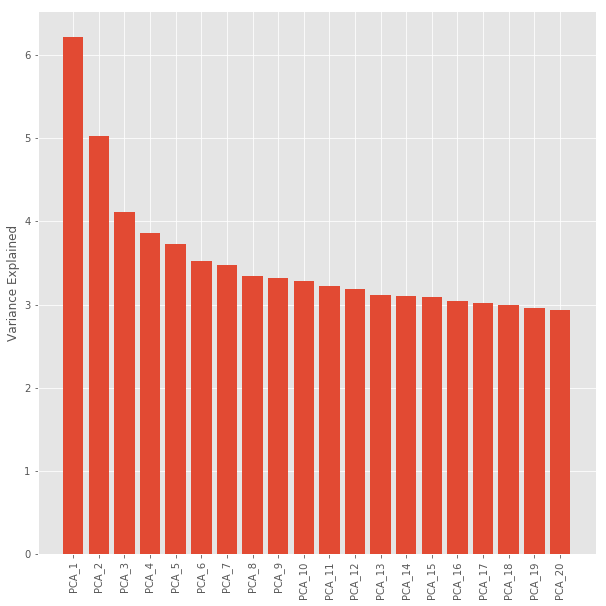

In [133]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.bar(pca_range,
        pca.explained_variance_[:n_col_to_display],
        align='center')
xticks = plt.xticks(pca_range,
                    pca_names,
                    rotation=90)
plt.ylabel('Variance Explained')
plt.show()


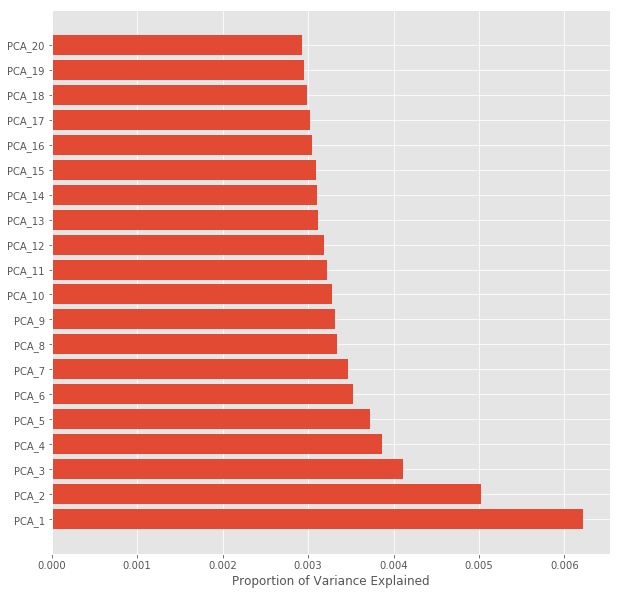

In [134]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.barh(pca_range, pca.explained_variance_ratio_[:n_col_to_display], align='center')
xticks = plt.yticks(pca_range, pca_names)
plt.xlabel('Proportion of Variance Explained')

plt.show()

## Classifying positive/negative review with PCA preprocessing

In [135]:
X_train_scaled.shape, y_train.shape

((1939L, 1000L), (1939L,))

In [136]:
X_train_pca.shape, y_train.shape

((1939L, 50L), (1939L,))

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [137]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()

model_lrc.fit(X_train_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
# Get score for training set
model_lrc.score(X_train_scaled, y_train)

0.99638989169675085

In [139]:
# Get score for test set
model_lrc.score(X_test_scaled, y_test)

0.68509615384615385

We can see that the logistic regression model is very overfitting.

#### Use (Stardardized + PCA) tf-idf vectors as features

In [140]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

model_lrc_pca = LogisticRegression()

model_lrc_pca.fit(X_train_pca, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
# Get score for training set
model_lrc_pca.score(X_train_pca, y_train)

0.78597215059308922

In [142]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_lrc_pca.score(X_test_pca, y_test)

0.79927884615384615

We can see that using standardized PCA features, the model doesn't have the overfitting problem now.

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

A: PCA preprocessing helps to solve the overfitting problem compared with non-PCA preprocessing.

#### You can plot the coefficients against principal components


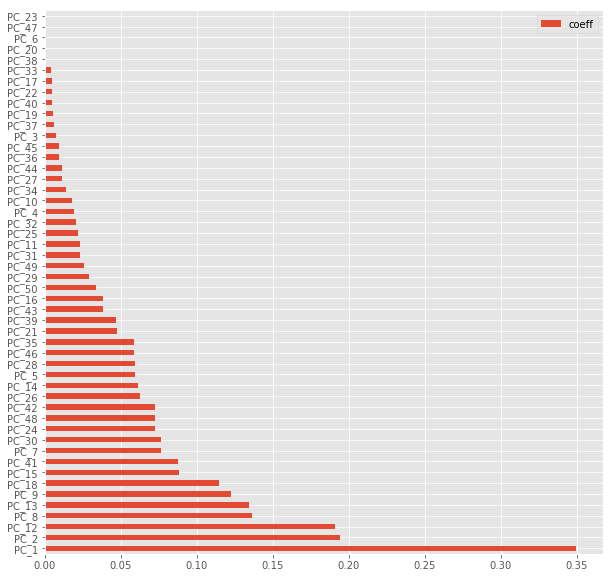

In [143]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, abs(model_lrc_pca.coef_.flatten())))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'coeff']

ax = df_coeffs.plot.barh(figsize=(10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [144]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [145]:
# Get score for training set
model_rf.score(X_train_scaled, y_train)

0.98762248581743162

In [146]:
# Get score for test set
model_rf.score(X_test_scaled, y_test)

0.75480769230769229

#### Use (Stardardized + PCA) tf-idf vectors as features

In [147]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf_pca = RandomForestClassifier()

model_rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
# Get score for training set
model_rf_pca.score(X_train_pca, y_train)

0.98916967509025266

In [149]:
# Get score for test set, REMEMBER to use PCA-transformed X!
model_rf_pca.score(X_test_pca, y_test)

0.75

#### Q: What do you see from the training result and the test result?

A: For the random forest model, the PCA preprocessing doesn't help with the overfitting problem.

#### You can plot the feature importances against principal components


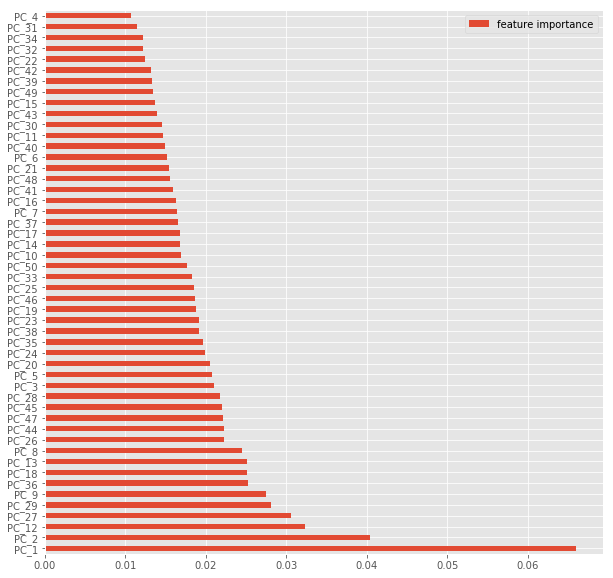

In [150]:
pca_range = np.arange(pca.n_components_) + 1
pca_names = ['PC_%s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, model_rf_pca.feature_importances_))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['PCs', 'feature importance']

ax = df_coeffs.plot.barh(figsize=(10, 10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [151]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


In [152]:
# get categories
categories = df['categories'].values

In [153]:
categories

array(['[Steakhouses, Cajun/Creole, Restaurants]',
       '[Steakhouses, Cajun/Creole, Restaurants]',
       '[Steakhouses, Cajun/Creole, Restaurants]', ...,
       '[Vegetarian, Mexican, Restaurants]',
       '[Vegetarian, Mexican, Restaurants]',
       '[Vegetarian, Mexican, Restaurants]'], dtype=object)

In [154]:
# generate target variable

df['favorable'] = df['stars']>4

target = df['favorable'].values

In [155]:
# Create training dataset and test dataset

from sklearn.cross_validation import train_test_split

categories_train, categories_test, target_train, target_test = train_test_split(categories, target, test_size = 0.3, random_state = 12)

In [156]:
# Get NLP representation of the documents

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)
vectors_train_categories = vectorizer.fit_transform(categories_train).toarray()
words_categories = vectorizer.get_feature_names()
vectors_categories = vectorizer.transform(categories).toarray()

In [157]:
# Cluster reviews with KMeans

from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(vectors_train_categories)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [158]:
# Make predictions on all your data
assigned_cluster_categories = kmeans.predict(vectors_categories)

In [159]:
# Find the top 10 features for each cluster.
# cluster centers shape
print "cluster centers:"
print kmeans.cluster_centers_.shape

cluster centers:
(8L, 432L)


In [160]:
kmeans.cluster_centers_

array([[ -3.52040445e-16,   7.89900606e-03,  -2.69803711e-16, ...,
         -6.39848688e-18,  -2.88939879e-16,  -8.02309608e-16],
       [  2.56795459e-03,   2.93998211e-03,   1.07292801e-03, ...,
          5.78083525e-05,   1.93869760e-03,   9.08358912e-03],
       [ -3.89011739e-16,   9.62732475e-04,  -3.33934269e-16, ...,
         -2.76132741e-19,  -3.22116465e-16,  -8.13585310e-16],
       ..., 
       [  7.14489232e-17,   2.32257204e-03,   2.82895984e-03, ...,
          1.11638942e-18,   2.05591548e-03,  -5.82433407e-16],
       [ -1.54715650e-16,   5.34728511e-16,   5.38848480e-17, ...,
         -2.23786105e-18,   1.31997211e-03,   3.84673785e-03],
       [ -2.81458884e-16,   1.21560748e-15,  -1.47397285e-16, ...,
         -8.81422485e-18,  -2.25514052e-16,  -7.80191883e-16]])

In [161]:
n_feat = 10
top_centroids_categories = kmeans.cluster_centers_.argsort()[:, -1:-n_feat:-1]

print "top features for each cluster:"
for num, centroid in enumerate(top_centroids_categories):
    print "%d: %s" % (num, ", ".join(words[i] for i in centroid))

top features for each cluster:
0: anyways, expensive, 6pm, friends, kaku, expectations, hands, bit, hungry
1: complain, friends, com, honey, background, gets, banchan, bite, girlfriend
2: 6pm, authentic, awesome, hungry, expectations, friends, background, gets, ayce
3: enoki, friends, com, expensive, complain, anyways, hit, girlfriend, enjoyed
4: high, dipping, anyways, friends, food, constantly, ago, experience, girlfriend
5: chunks, feeling, giving, beat, desert, guys, interesting, complain, friends
6: feel, dining, friends, hard, karaage, better, gave, girlfriend, gets
7: bf, ago, friends, constantly, host, dollars, angeles, isn, honestly


In [162]:
# random select sample from each cluster, then display samples with rating

for i in range(kmeans.n_clusters):
    cluster = np.arange(0, vectors_categories.shape[0])[assigned_cluster_categories==i] # index of cluster
    sample_categories = np.random.choice(cluster, 2, replace=False)
    print "=" * 10
    print "Cluster %d:" % i
    for categories_index in sample_categories:
        print "    %s - " % df.loc[categories_index]['stars'],
        print "%s" % df.loc[categories_index]['categories']
    print

Cluster 0:
    5 -  [Nightlife, Bars, Restaurants, American (New), Cocktail Bars, Wine Bars]
    5 -  [Restaurants, Nightlife, Seafood, Bars]

Cluster 1:
    4 -  [Coffee & Tea, Sandwiches, Restaurants, American (New), Music Venues, Bars, Food, Nightlife, Arts & Entertainment, Pubs]
    5 -  [Filipino, Restaurants]

Cluster 2:
    2 -  [Buffets, Arts & Entertainment, Casinos, Restaurants, American (Traditional)]
    3 -  [Pubs, Restaurants, Nightlife, American (Traditional), Burgers, African, Bars, Breakfast & Brunch, American (New)]

Cluster 3:
    2 -  [Nightlife, Restaurants, Mexican, Vegan, Bars]
    2 -  [Seafood, Restaurants, Mexican]

Cluster 4:
    4 -  [Food, Sushi Bars, Restaurants, Japanese, Poke, Hawaiian]
    5 -  [Japanese, Restaurants, Sushi Bars]

Cluster 5:
    5 -  [Restaurants, Event Planning & Services, Italian, Venues & Event Spaces]
    1 -  [Arts & Entertainment, Hotels & Travel, Event Planning & Services, Restaurants, Casinos, Hotels]

Cluster 6:
    2 -  [Resta

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [163]:
import nltk
from scipy.spatial.distance import cdist
from nltk.cluster.kmeans import KMeansClusterer

In [164]:
NUM_CLUSTERS = 5
data = vectors_documents_top_restaurant

# clustering using cosine_distance
kclusterer_cos = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=10)
assigned_clusters_cos = kclusterer_cos.cluster(data, assign_clusters=True)

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

It means cluster categories based on similarity of business entities.

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [165]:
restaurant = df.name.unique()
best_rep = kmeans.cluster_centers_.argsort()[:, -1] 
# argsort orders from small to big, -1 is used to select the one with highest weight in the centroid vector..
for i, rep in enumerate(best_rep):
    print "Cluster %i: Best represent Restaurant %s" % (i, restaurant[i] )

Cluster 0: Best represent Restaurant Delmonico Steakhouse
Cluster 1: Best represent Restaurant Michael Mina
Cluster 2: Best represent Restaurant Sin City Thai Restaurant
Cluster 3: Best represent Restaurant Fresh Buffet
Cluster 4: Best represent Restaurant Smashburger
Cluster 5: Best represent Restaurant In-N-Out Burger
Cluster 6: Best represent Restaurant Merkato Ethiopian Cafe
Cluster 7: Best represent Restaurant The Rice Shop
